In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Распределение хи-квадрат:
$$f(x, df) = \frac{1}{2\gamma(df/2)}(x/2)^{df/2-1}exp(-x/2)$$

$\gamma$ - Гамма-распределение (Хи-квадрат - его частный случай)

$df$ - степени свободы

https://ru.wikipedia.org/wiki/Распределение_хи-квадрат

In [101]:
# создание распределение с df=2 и выборки размера 1000
chi_rv = sts.chi2(2)
sample = chi_rv.rvs(1000)

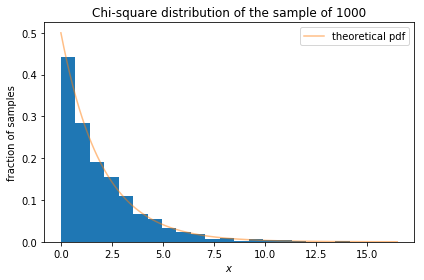

In [136]:
# гистограмма распределения хи-квадрат по выборке
plt.hist(sample, bins = 20, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title('Chi-square distribution of the sample of 1000')
# теоретическая плотность распределения
x = np.linspace(0,16.5,1000)
pdf = chi_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.tight_layout()

Параметры нормального распределения, выраженные через теоретические параметры распределения хи-квадрат:

$$\mu = k$$

$$\sigma^2 = 2k$$

$$\overline{X}{n}\space≈\space\sim N(\mu, \frac{\sigma^2}{n})$$

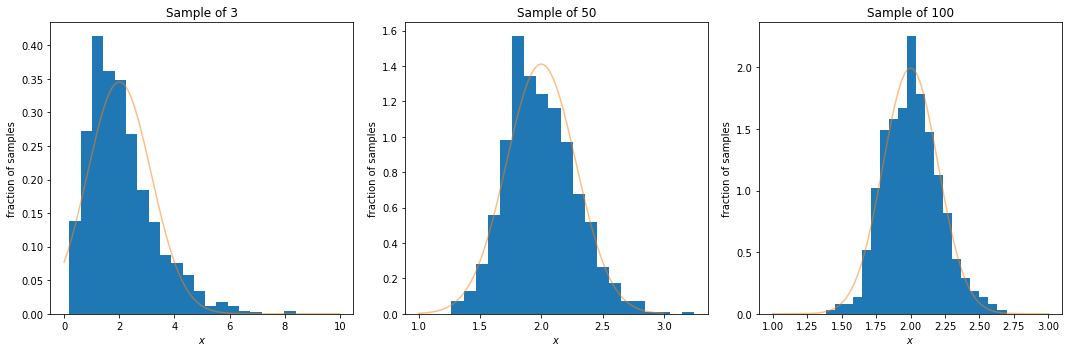

In [135]:
# список со тысячью средних по выборке n=3
i = 1
L = []
while i <= 1000:
    L.append(chi_rv.rvs(3).mean())
    i += 1
    
# параметры нормального распределения для scipy
mu = 2
sd = (4./3)**0.5

# гистограмма распределений выборочных средних
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.hist(L, bins = 20, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title('Sample of 3')
# аппроксимирующее нормальное распределеине
norm_rv = sts.norm(mu, sd)
x = np.linspace(0,10,1000)
pdfn = norm_rv.pdf(x)
plt.plot(x, pdfn, label = 'normal distribution', alpha = 0.5)

# список со тысячью средних по выборке n=50
plt.subplot(1, 3, 2)
i = 1
L = []
while i <= 1000:
    s = chi_rv.rvs(50)
    L.append(s.mean())
    i += 1

# параметры нормального распределения
sd = (4./50)**0.5

# гистограмма распределений выборочных средних
plt.hist(L, bins = 20, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title('Sample of 50')
# аппроксимирующее нормальное распределеине
norm_rv = sts.norm(mu, sd)
x = np.linspace(1,3,1000)
pdfn = norm_rv.pdf(x)
plt.plot(x, pdfn, label = 'normal distribution', alpha = 0.5)

# список со тысячью средних по выборке n=100
plt.subplot(1, 3, 3)
i = 1
L = []
while i <= 1000:
    s = chi_rv.rvs(100)
    L.append(s.mean())
    i += 1

# параметры нормального распределения
sd = (4./100)**0.5

# гистограмма распределений выборочных средних
plt.hist(L, bins = 20, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.title('Sample of 100')
# аппроксимирующее нормальное распределеине
norm_rv = sts.norm(mu, sd)
x = np.linspace(1,3,1000)
pdfn = norm_rv.pdf(x)
plt.plot(x, pdfn, label = 'normal distribution', alpha = 0.5)


plt.tight_layout()

## Вывод
При маленькой выборке распределение выборочных средних по форме похоже на исходное распределение хи-квадрат, но с увеличением размера выборки оно все лучше и лучше аппроксимируется нормальным с теоретическими параметрами распределения хи-квадрат, взятыми для конкретной выборки.